In [87]:
import numpy as np
import seaborn as sns;
%matplotlib inline

In [157]:
import numpy as np
import seaborn as sns;
import q_learn as ql
reload(ql)
import robbery as rb
reload(rb)

<module 'robbery' from 'robbery.py'>

In [89]:
# del q1, q2, q3, q4, game 
q1 = ql.Agent('p1')
q2 = ql.Agent('p2')
q3 = ql.Agent('p3')
q4 = ql.Agent('p4')

game = rb.Robbery('test', [5,5,5,5], *ql.Agent.get_agents())

In [90]:
game.playlist

(<q_learn.Agent instance at 0x7fe8704e2a28>,
 <q_learn.Agent instance at 0x7fe870601680>,
 <q_learn.Agent instance at 0x7fe870a84c68>,
 <q_learn.Agent instance at 0x7fe870768c68>)

In [91]:
valids1 = game.valid_moves(1)
valids1[np.random.choice(valids1.shape[0])]+game.state

array([5, 6, 5, 4])

In [92]:
valids1.shape

(4, 4)

In [93]:
test = np.zeros((10000,4))
game.state = (5,5,5,5)
for i in range(100):
    test[i]=game.harvest()
np.sum(test, axis=0)

array([ 23.,  14.,  18.,  18.])

In [94]:
(np.array([1,2,3,4,5,5,4,3,2,1])/36.).mean()

0.083333333333333343

In [95]:
game.harvest()

array([0, 1, 0, 0])

In [96]:
y = lambda x: np.ceil(2*np.cbrt(x-4))
y(80)

9.0

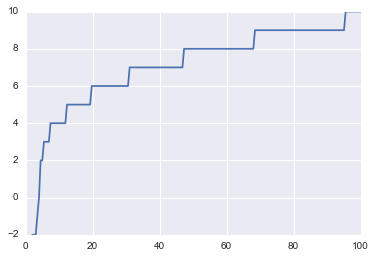

In [97]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(2,100,200), y(np.linspace(2,100,200)))

In [158]:
q1 = ql.Agent('p1')
q2 = ql.Agent('p2')
q3 = ql.Agent('p3')
q4 = ql.Agent('p4')

game = rb.Robbery('test', [2,2,2,2], *ql.Agent.get_agents())

In [191]:
from tqdm import tqdm
for i in tqdm(range(50000)):
    game.reset()
    game.play()

In [192]:
len(q1.Q.keys())

23863

In [193]:
states = q1.Q.keys()
control = []
for state in q1.Q.keys():
    policy = max(q1.Q[state].iterkeys(), key=(lambda key: q1.Q[state][key]))
    control+=[str(policy)]
control = np.array(control)

In [194]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(np.array(states), np.array(control))

In [195]:
who_rob = np.zeros(len(control))
who_rob[control!='(0, 0, 0, 0)']=1
who_rob[who_rob!=1]=0
print who_rob.sum()

16925.0


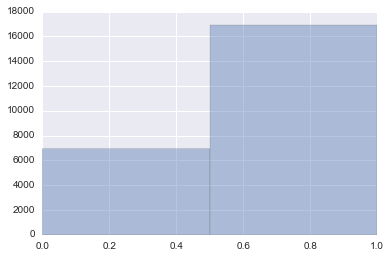

In [196]:
sns.distplot(who_rob, bins=2, kde=False)

In [197]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(states, control)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

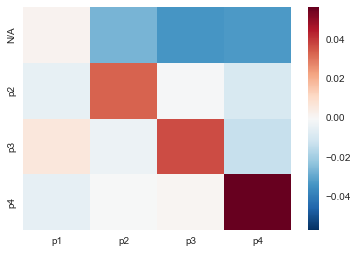

In [198]:

sns.heatmap(lr.coef_, yticklabels=['N/A', 'p2', 'p3', 'p4'], xticklabels=['p1','p2', 'p3', 'p4'])

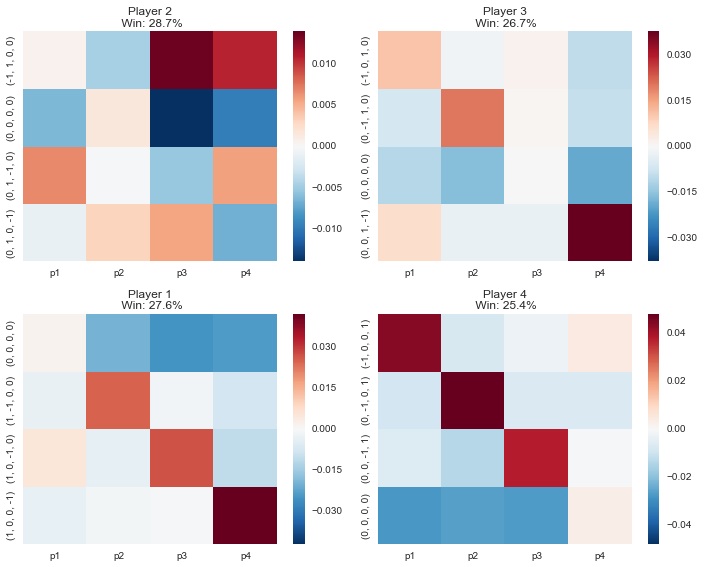

In [232]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,8))

for n,player in enumerate(ql.Agent.get_agents()):
    states = player.Q.keys()
    control = []
    for state in player.Q.keys():
        policy = max(player.Q[state].iterkeys(), key=(lambda key: player.Q[state][key]))
        control+=[str(policy)]
    control = np.array(control)
#     able_to_rob = ['p1', 'p2', 'p3', 'p4']
#     able_to_rob[n] = 'N/A'
    lr = LogisticRegression(class_weight='balanced',
                            multi_class='multinomial',
                            solver='lbfgs')
    lr.fit(states, control)
    
    controls = lr.classes_.tolist()
    sns.heatmap(lr.coef_, ax = ax.flatten()[n],
                yticklabels = controls,
                xticklabels = ['p1','p2', 'p3', 'p4'])
    winpct = 100.*float(player.wins)/player.games_played
    ax.flatten()[n].set_title('Player {0:.0f}\n Win: {1:.1f}%'.format(controls.index('(0, 0, 0, 0)')+1,
                                                                                   winpct))

#     ax.flatten(order='F')[n].set_title('Player'+str(n+1)+'\nWins: {0:.0f}'.format(player.wins))
plt.tight_layout()

In [168]:
lr.classes_


array(['(-1, 0, 0, 1)', '(0, -1, 0, 1)', '(0, 0, -1, 1)', '(0, 0, 0, 0)'], 
      dtype='|S13')

In [201]:
import pickle as pkl
for i in ql.Agent.get_agents():
    with open(i.str+'_table.txt', 'w') as f:
        pkl.dump(i.Q, f)

In [207]:
with open(i.str+'_table.txt', 'rb') as f:
    print len(pkl.load(f).keys())

23863


In [211]:
lr.

array([ 3.25,  8.  ,  5.5 , ...,  5.  ,  3.75,  4.  ])

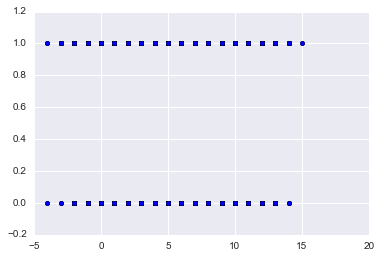

In [217]:
plt.scatter(np.array(q1.Q.keys())[:,0],who_rob)


In [229]:
np.array(q1.Q.keys())[who_rob==0].shape

(6938, 4)

16461.0


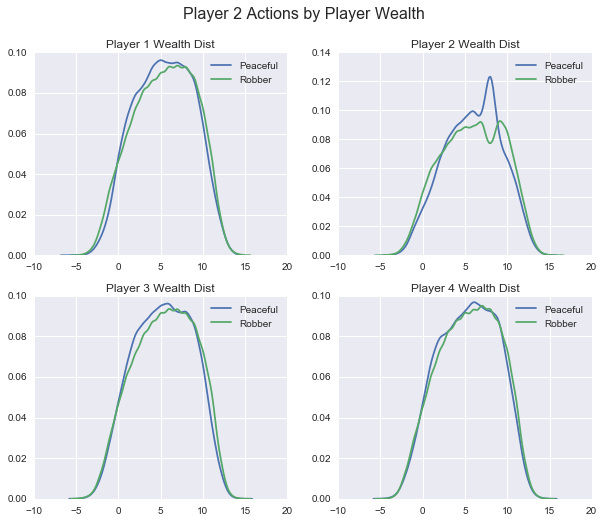

In [251]:
states = q2.Q.keys()
control = []
for state in states:
    policy = max(q2.Q[state].iterkeys(), key=(lambda key: q2.Q[state][key]))
    control+=[str(policy)]
control = np.array(control)

who_rob = np.zeros(len(control))
who_rob[control!='(0, 0, 0, 0)']=1
who_rob[who_rob!=1]=0
print who_rob.sum()


fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
for n,i in enumerate(ax.flatten()):
    sns.distplot(np.array(states)[who_rob==0][:,n], ax=i, label='Peaceful', hist=False)
    sns.distplot(np.array(states)[who_rob==1][:,n], ax=i, label='Robber', hist=False)
    i.legend()
    i.set_title('Player {} Wealth Dist'.format(n+1))
fig.suptitle('Player 2 Actions by Player Wealth', size=16)

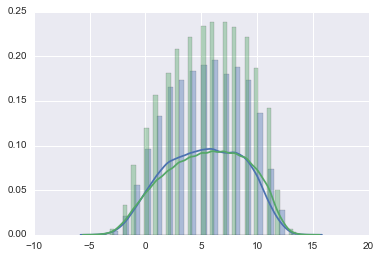

In [236]:
sns.distplot(np.array(states)[who_rob==0][:,2])
sns.distplot(np.array(states)[who_rob==1][:,2])